# 주가 데이터 분석

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 주가 데이터
데이터 구조는 장이름, 날짜, 시작가, 장중 고가, 저가, 종가, 수정종가로 구성  
국가는 한, 미, 중 등의 국가별 주가데이터가 있음

In [3]:
path = '/Univercity/Bigdata/stock_data/'
file = path+'indexData.csv'

stock = pd.read_csv(file)
stock = stock.drop(['Volume','Adj Close'], axis=1)
stock.head()

,Index,Date,Open,High,Low,Close
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007


In [4]:
kr_stock = stock[70044:76223]
kr_stock

,Index,Date,Open,High,Low,Close
70044,KS11,1996-12-13,690.440002,695.719971,677.640015,689.070007
70045,KS11,1996-12-16,686.969971,686.969971,667.710022,673.919983
70046,KS11,1996-12-17,675.349976,680.090027,660.390015,663.349976
70047,KS11,1996-12-18,662.070007,671.429993,655.469971,661.390015
70048,KS11,1996-12-19,668.130005,690.969971,668.130005,690.969971
...,...,...,...,...,...,...
76218,KS11,2021-05-26,3171.909912,3183.969971,3160.300049,3168.429932
76219,KS11,2021-05-27,3170.840088,3173.860107,3142.370117,3165.510010
76220,KS11,2021-05-28,3172.090088,3198.659912,3171.850098,3188.729980
76221,KS11,2021-05-31,3192.060059,3204.290039,3179.870117,3203.919922


In [5]:
kr_stock.loc[kr_stock['High'] == 0, 'High'] = kr_stock['Open']
kr_stock.loc[kr_stock['Low'] == 0, 'Low'] = kr_stock['Open']
kr_stock.loc[kr_stock['Close'] == 0, 'Close'] = kr_stock['Open']

In [6]:
# kr_stock_per = pd.DataFrame({'high':kr_stock['High'] / kr_stock['Open'], 'low':kr_stock['Low'] / kr_stock['Open'], 'close':kr_stock['Close'] / kr_stock['Open']})
# kr_stock_per

low90 = kr_stock[kr_stock['Low'] <= kr_stock['Open']*0.9]
print(f'low90 size : {len(low90)}\nlen95 percent : {len(low90)/len(kr_stock)}')
(low90['Close'] / low95['Open']).plot.hist()
# (low90['Open'] / low95['Open']).plot()

# 시작가 대비 2% 내려갔을때 산 경우

In [14]:
_05percent_lower = kr_stock[kr_stock['Open']*0.995 >= kr_stock['Low']]
print('0.5% : ',len(_05percent_lower) / len(kr_stock))
_1percent_lower = kr_stock[kr_stock['Open']*0.99 >= kr_stock['Low']]
print('1% : ',len(_1percent_lower) / len(kr_stock))
_2percent_lower = kr_stock[kr_stock['Open']*0.98 >= kr_stock['Low']]
print('2% : ',len(_2percent_lower) / len(kr_stock))
_5percent_lower = kr_stock[kr_stock['Open']*0.95 >= kr_stock['Low']]
print('5% : ',len(_5percent_lower) / len(kr_stock))
_10percent_lower = kr_stock[kr_stock['Open']*0.90 >= kr_stock['Low']]
print('10% : ',len(_10percent_lower) / len(kr_stock))

0.5% :  0.5580190969412526
1% :  0.2995630360899822
2% :  0.10195824567082053
5% :  0.007768247289205373
10% :  0.0004855154555753358


In [16]:
print('more -1% : ',len(kr_stock[kr_stock['Close'] <= kr_stock['Open']*0.995*0.99]) / len(kr_stock))
print('more -0.5% : ',len(kr_stock[kr_stock['Close'] <= kr_stock['Open']*0.995*0.995]) / len(kr_stock))
print('more 0.5% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.995*1.005]) / len(kr_stock))
print('more 1% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.995*1.01]) / len(kr_stock))
print('more 2% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.995*1.02]) / len(kr_stock))
print('more 3% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.995*1.03]) / len(kr_stock))
print('more 4% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.995*1.04]) / len(kr_stock))

more -1% :  0.09580838323353294
more -0.5% :  0.15309920699142257
more 0.5% :  0.5049360737983493
more 1% :  0.2701084317850785
more 2% :  0.08609807412202622
more 3% :  0.03188218158278038
more 4% :  0.01262340184495873


In [15]:
_2percent_lower = kr_stock[kr_stock['Open']*0.98 >= kr_stock['Low']]

print('more -1% : ',len(kr_stock[kr_stock['Close'] <= kr_stock['Open']*0.98*0.99]) / len(kr_stock))
print('more -0.5% : ',len(kr_stock[kr_stock['Close'] <= kr_stock['Open']*0.98*0.995]) / len(kr_stock))
print('more 0.5% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.98*1.005]) / len(kr_stock))
print('more 1% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.98*1.01]) / len(kr_stock))
print('more 2% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.98*1.02]) / len(kr_stock))
print('more 3% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.98*1.03]) / len(kr_stock))
print('more 4% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.98*1.04]) / len(kr_stock))

more -1% :  0.02540864217510924
more -0.5% :  0.0393267519016022
more 0.5% :  0.9058100016183849
more 1% :  0.8507849166531801
more 2% :  0.5227383071694449
more 3% :  0.15795436154717593
more 4% :  0.05227383071694449


In [67]:
print('more -1% : ',len(kr_stock[kr_stock['High'] <= kr_stock['Open']*0.98*0.99]) / len(kr_stock))
print('more -0.5% : ',len(kr_stock[kr_stock['High'] <= kr_stock['Open']*0.98*0.995]) / len(kr_stock))
print('more 0.5% : ',len(kr_stock[kr_stock['High'] >= kr_stock['Open']*0.98*1.005]) / len(kr_stock))
print('more 1% : ',len(kr_stock[kr_stock['High'] >= kr_stock['Open']*0.98*1.01]) / len(kr_stock))
print('more 2% : ',len(kr_stock[kr_stock['High'] >= kr_stock['Open']*0.98*1.02]) / len(kr_stock))
print('more 3% : ',len(kr_stock[kr_stock['High'] >= kr_stock['Open']*0.98*1.03]) / len(kr_stock))
print('more 4% : ',len(kr_stock[kr_stock['High'] >= kr_stock['Open']*0.98*1.04]) / len(kr_stock))

more -1% :  0.0001618384851917786
more -0.5% :  0.0001618384851917786
more 0.5% :  0.9998381615148082
more 1% :  0.9998381615148082
more 2% :  0.9998381615148082
more 3% :  0.2715649781518045
more 4% :  0.08642175109240978


## 시작가 대비 1% 내려갔을때 산 경우

In [61]:
_1percent_lower = kr_stock[kr_stock['Open']*0.99 < kr_stock['Close']]
len(_1percent_lower) / len(kr_stock)

0.8477099854345364

In [63]:
_1percent_lower
print('more -1% : ',len(kr_stock[kr_stock['Close'] <= kr_stock['Open']*0.99*0.99]) / len(kr_stock))
print('more -0.5% : ',len(kr_stock[kr_stock['Close'] <= kr_stock['Open']*0.99*0.995]) / len(kr_stock))
print('more 0.5% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.99*1.005]) / len(kr_stock))
print('more 1% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.99*1.01]) / len(kr_stock))
print('more 2% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.99*1.02]) / len(kr_stock))
print('more 3% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.99*1.03]) / len(kr_stock))
print('more 4% : ',len(kr_stock[kr_stock['Close'] >= kr_stock['Open']*0.99*1.04]) / len(kr_stock))

more -1% :  0.06068943194691698
more -0.5% :  0.09580838323353294
more 0.5% :  0.721475966984949
more 1% :  0.5083346819873766
more 2% :  0.1506716297135459
more 3% :  0.05016993040945137
more 4% :  0.02071532610454766


## 저가 시작가 대비 4%이상 내려간 경우

low96 size : 130
low96 percent : 0.021039003074931218


<Axes: >

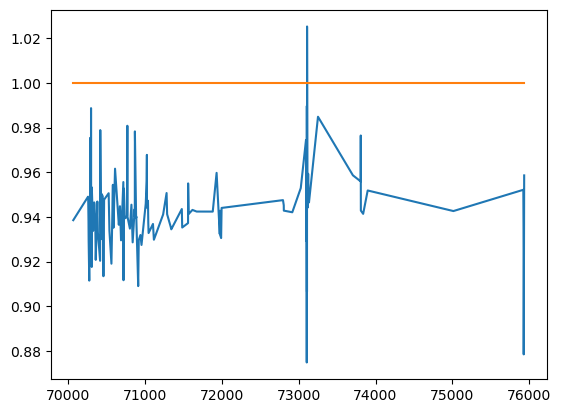

In [66]:
low96 = kr_stock[kr_stock['Low'] <= kr_stock['Open']*0.96]
print(f'low96 size : {len(low96)}\nlow96 percent : {len(low96)/len(kr_stock)}')
(low96['Close'] / low96['Open']*0.98).plot()
# (low96['High'] / low96['Open']).plot()
(low96['Open'] / low96['Open']).plot()

more -1% :  0.8
more -0.5% :  0.8538461538461538
more 0.5% :  0.08461538461538462
more 1% :  0.07692307692307693
more 2% :  0.038461538461538464
more 3% :  0.015384615384615385
more 4% :  0.007692307692307693


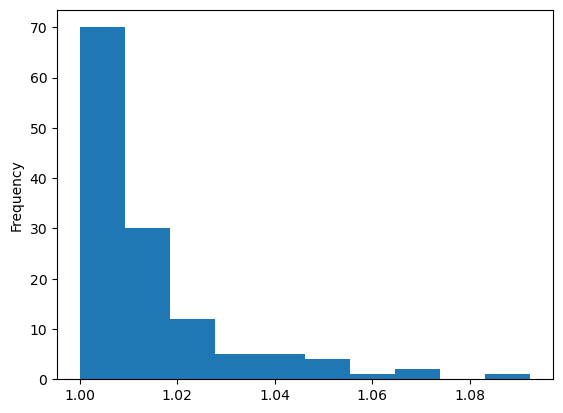

In [64]:
(low96['Close'] / low96['Low']).plot.hist()
# len(low96[low96['Close'] > low96['Low']]) / len(low95)
print('more -1% : ',len(low96[low96['Close'] <= low96['Open']*0.98*0.99]) / len(low96))
print('more -0.5% : ',len(low96[low96['Close'] <= low96['Open']*0.98*0.995]) / len(low96))
print('more 0.5% : ',len(low96[low96['Close'] >= low96['Open']*0.98*1.005]) / len(low96))
print('more 1% : ',len(low96[low96['Close'] >= low96['Open']*0.98*1.01]) / len(low96))
print('more 2% : ',len(low96[low96['Close'] >= low96['Open']*0.98*1.02]) / len(low96))
print('more 3% : ',len(low96[low96['Close'] >= low96['Open']*0.98*1.03]) / len(low96))
print('more 4% : ',len(low96[low96['Close'] >= low96['Open']*0.98*1.04]) / len(low96))

## 저가 시작가 대비 2%이상 내려간 경우

low98 size : 630
low98 percent : 0.10195824567082053


<Axes: >

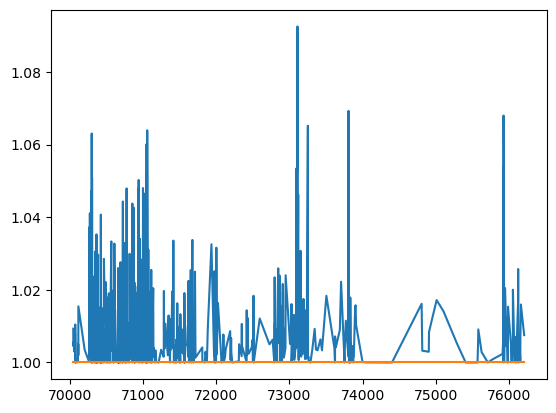

In [65]:
low98 = kr_stock[kr_stock['Low'] <= kr_stock['Open']*0.98]
print(f'low98 size : {len(low98)}\nlow98 percent : {len(low98)/len(kr_stock)}')
(low98['Close'] / low98['Low']).plot()
# (low96['High'] / low96['Open']).plot()
(low98['Open'] / low98['Open']).plot()

more -1% :  0.2492063492063492
more -0.5% :  0.38571428571428573
more 0.5% :  0.24603174603174602
more 1% :  0.16507936507936508
more 2% :  0.0761904761904762


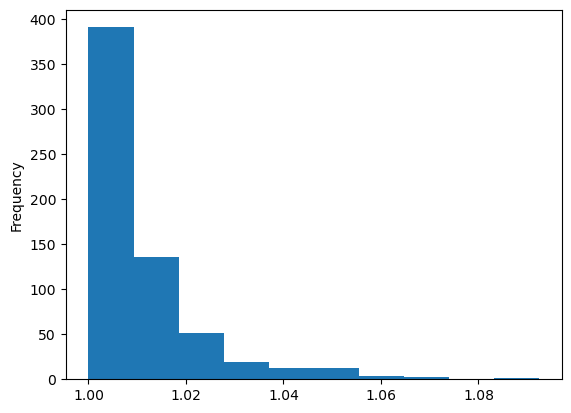

In [11]:
(low98['Close'] / low98['Low']).plot.hist()
# len(low96[low96['Close'] > low96['Low']]) / len(low95)
print('more -1% : ',len(low98[low98['Close'] <= low98['Open']*0.98*0.99]) / len(low98))
print('more -0.5% : ',len(low98[low98['Close'] <= low98['Open']*0.98*0.995]) / len(low98))
print('more 0.5% : ',len(low98[low98['Close'] >= low98['Open']*0.98*1.005]) / len(low98))
print('more 1% : ',len(low98[low98['Close'] >= low98['Open']*0.98*1.01]) / len(low98))
print('more 2% : ',len(low98[low98['Close'] >= low98['Open']*0.98*1.02]) / len(low98))

## 통계

In [12]:
stock.describe()

,Open,High,Low,Close
count,112457.000000,112457.000000,112457.000000,112457.000000
mean,7509.523084,7554.481935,7459.998163,7508.572591
std,8984.806613,9039.791376,8927.964299,8984.821960
min,0.000000,0.000000,0.000000,0.000000
25%,1714.479980,1722.400024,1703.780029,1714.060059
50%,5012.060059,5040.080078,4982.200195,5011.379883
75%,9994.120117,10062.650390,9922.070313,9992.669922
max,68775.062500,69403.750000,68516.992190,68775.062500


# GDP 데이터
267개 국가의 1960 ~2020년 까지의 연GDP 데이터로 구성

In [13]:
path = '/Univercity/Bigdata/gdp_data/'
file = path + 'gdp.csv'

gdp = pd.read_csv(file)
gdp.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


# 대한민국 주가-GDP 상관계수

## 대한민국 주가 데이터
1996~2021년까지의 주가 데이터로 구성

In [14]:
kr_stock = stock[70044:76223]
kr_stock

,Index,Date,Open,High,Low,Close
70044,KS11,1996-12-13,690.440002,695.719971,677.640015,689.070007
70045,KS11,1996-12-16,686.969971,686.969971,667.710022,673.919983
70046,KS11,1996-12-17,675.349976,680.090027,660.390015,663.349976
70047,KS11,1996-12-18,662.070007,671.429993,655.469971,661.390015
70048,KS11,1996-12-19,668.130005,690.969971,668.130005,690.969971
...,...,...,...,...,...,...
76218,KS11,2021-05-26,3171.909912,3183.969971,3160.300049,3168.429932
76219,KS11,2021-05-27,3170.840088,3173.860107,3142.370117,3165.510010
76220,KS11,2021-05-28,3172.090088,3198.659912,3171.850098,3188.729980
76221,KS11,2021-05-31,3192.060059,3204.290039,3179.870117,3203.919922


<Axes: title={'center': 'KR Stock'}, xlabel='Date'>

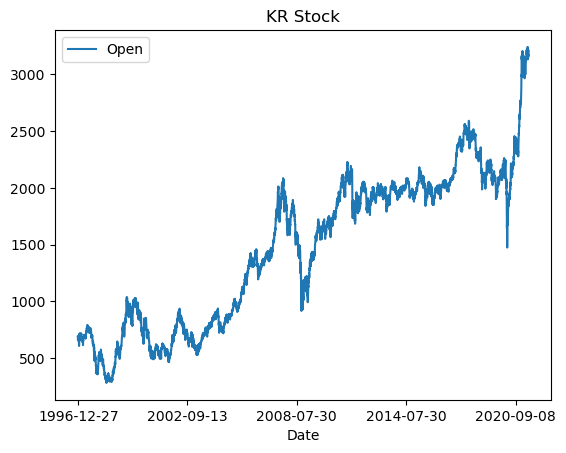

In [15]:
kr_stock.plot(x='Date', y ='Open', xticks=[10,1500,3000,4500,6000], title='KR Stock')

### 데이터 통계
시작가와 종가 비교에서 최대의 경우를 제외하고 시작가 보다 종가가 낮은 모습을 보임.

In [16]:
kr_stock.describe()

,Open,High,Low,Close
count,6179.000000,6179.000000,6179.000000,6179.000000
mean,1473.513597,1482.611168,1462.302236,1472.860469
std,671.542914,673.001972,669.137137,671.274984
min,283.410004,291.010010,277.369995,280.000000
25%,794.675019,802.804993,786.134979,794.095001
50%,1630.890015,1643.079956,1614.849976,1628.420044
75%,2006.864990,2014.219971,1995.739990,2005.609985
max,3239.919922,3266.229980,3203.250000,3249.300049


### 상관계수
장내 고가와 저가 모두 종가와의 상관관계가 가장 높았음

In [17]:
kr_stock_corr = kr_stock.corr(numeric_only=True)
kr_stock_corr

,Open,High,Low,Close
Open,1.000000,0.999897,0.999841,0.999730
High,0.999897,1.000000,0.999805,0.999857
Low,0.999841,0.999805,1.000000,0.999881
Close,0.999730,0.999857,0.999881,1.000000


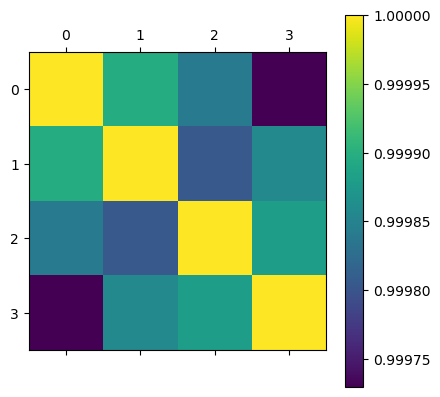

In [18]:
plt.matshow(kr_stock_corr)
plt.colorbar()

## 대한민국 GDP 데이터

In [19]:
kr_gdp = gdp.loc[126][2:-1]
kr_gdp

1960        3958190758.62419
1961        2417558289.36656
1962        2814318516.60968
1963        3988784572.24835
1964        3458939357.73377
                ...         
2016    1500111596236.370117
2017    1623901496835.790039
2018     1724845615629.26001
2019     1651422932447.77002
2020    1637895802792.899902
Name: 126, Length: 61, dtype: object

<Axes: title={'center': 'KR GDP'}>

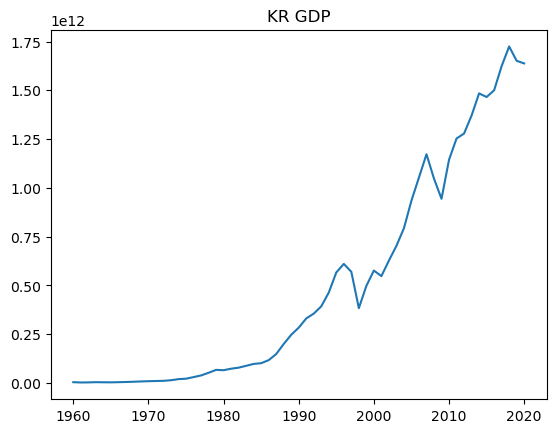

In [20]:
kr_gdp.plot(title='KR GDP')

## 연평균 주가
97~20년 주가 데이터를 연GDP와 비교하기 위해 연평균 주가로 변환

In [21]:
kr_stock[13:-102]

,Index,Date,Open,High,Low,Close
70057,KS11,1997-01-01,654.820007,654.820007,654.820007,654.820007
70058,KS11,1997-01-02,654.820007,654.820007,654.820007,654.820007
70059,KS11,1997-01-03,647.669983,655.700012,635.409973,653.789978
70060,KS11,1997-01-06,637.979980,637.979980,625.010010,626.869995
70061,KS11,1997-01-07,622.450012,627.609985,609.119995,611.049988
...,...,...,...,...,...,...
76116,KS11,2020-12-23,2737.739990,2769.080078,2716.280029,2759.820068
76117,KS11,2020-12-24,2762.600098,2812.159912,2762.600098,2806.860107
76118,KS11,2020-12-28,2820.949951,2834.590088,2799.560059,2808.600098
76119,KS11,2020-12-29,2810.550049,2823.439941,2792.060059,2820.510010


In [22]:
y = {}
for i in range(1997,2021):
    y[i]=[]

In [23]:
for i in range(70057,76121):
    for j in y:
        if int(kr_stock.loc[i]['Date'][:4]) == j:
            y[j].append(float(kr_stock.loc[i]['Open']))

In [24]:
kr_stock_year_avg={}

for i in y:
    kr_stock_year_avg[i] = sum(y[i])/len(y[i])/6.526

kr_stock_year_avg = list(kr_stock_year_avg.values())

## 주가-GDP

In [25]:
kr_corr_data = pd.DataFrame({'gdp':kr_gdp[37:]/5690000000,'stock':kr_stock_year_avg})
kr_corr_data.head()

,gdp,stock
1997,100.132609,100.000469
1998,67.369232,62.519741
1999,87.43632,123.234031
2000,101.261531,112.560975
2001,96.24925,87.594168


<Axes: title={'center': 'KR GDP-Stock'}, xlabel='year'>

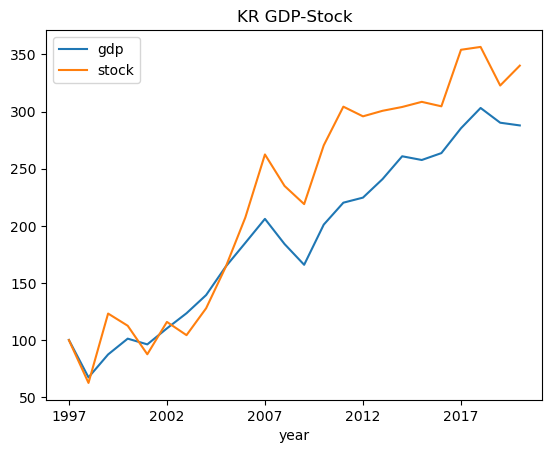

In [26]:
kr_corr_data.plot(title='KR GDP-Stock', xlabel='year')

## 상관계수

In [27]:
kr_corr_data.corr()

,gdp,stock
gdp,1.000000,0.975221
stock,0.975221,1.000000


# 미국 주가-GDP 상관계수

## 주가 데이터
1965~2021까지의 주가 데이터로 구성

In [28]:
us_stock = stock[:13948]
us_stock

,Index,Date,Open,High,Low,Close
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007
...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220


<Axes: title={'center': 'US Stock'}, xlabel='Date'>

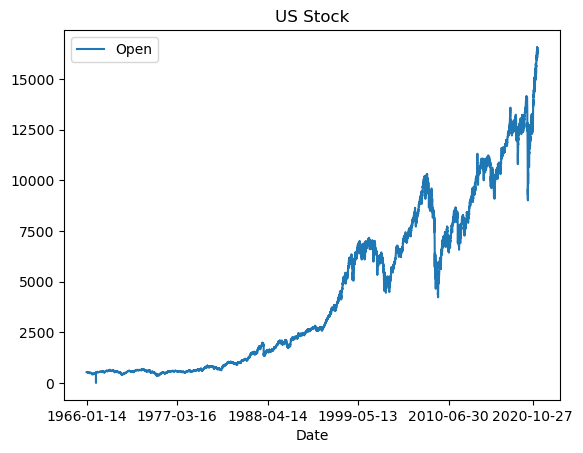

In [29]:
us_stock.plot(x='Date', y ='Open', xticks=[10,2800,5600,8400,11200,13800], title='US Stock')

### 통계
상위 75% 부분에서 시작가보다 종가가 더 높은 모습을 보임.

In [30]:
us_stock.describe()

,Open,High,Low,Close
count,13948.000000,13948.000000,13948.000000,13948.000000
mean,4451.458981,4467.916202,4433.377141,4451.855513
std,4074.981990,4095.194873,4052.830239,4075.487612
min,0.000000,0.000000,0.000000,0.000000
25%,654.912506,654.912506,654.912506,654.912506
50%,2631.325074,2631.325074,2631.325074,2631.325074
75%,7338.369995,7375.124878,7276.579956,7337.592529
max,16590.429690,16685.890630,16531.949220,16590.429690


### 상관계수
시작가는 고가와의 상관계수가 가장 높았음  
종가는 저가와의 상관계수가 가장 높았음

In [31]:
us_stock.corr(numeric_only=True)

,Open,High,Low,Close
Open,1.000000,0.999963,0.999937,0.999912
High,0.999963,1.000000,0.999912,0.999949
Low,0.999937,0.999912,1.000000,0.999958
Close,0.999912,0.999949,0.999958,1.000000


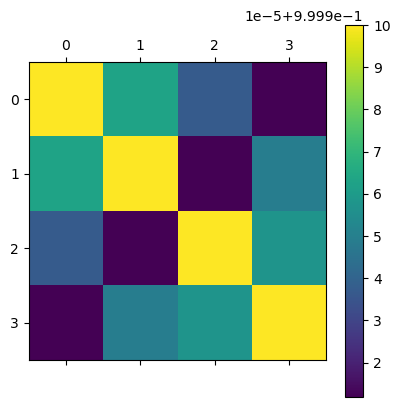

In [32]:
plt.matshow(us_stock.corr(numeric_only=True))
plt.colorbar()

## 미국 GDP 데이터

In [33]:
us_gdp = gdp.loc[251][2:-1]
us_gdp

1960      543300000000.0
1961      563300000000.0
1962      605100000000.0
1963      638600000000.0
1964      685800000000.0
              ...       
2016    18745075687000.0
2017    19542979183000.0
2018    20611860934000.0
2019    21433224697000.0
2020    20953030000000.0
Name: 251, Length: 61, dtype: object

<Axes: title={'center': 'US GDP'}>

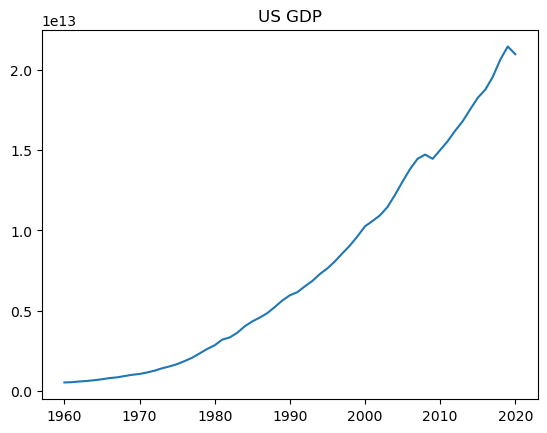

In [34]:
us_gdp.plot(title='US GDP')

## 주가 데이터 연 평균

In [35]:
us_stock = us_stock[:13846]
us_stock

,Index,Date,Open,High,Low,Close
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007
...,...,...,...,...,...,...
13841,NYA,2020-12-24,14398.620120,14398.620120,14324.769530,14382.500000
13842,NYA,2020-12-28,14476.349610,14481.480470,14396.230470,14405.769530
13843,NYA,2020-12-29,14500.030270,14515.809570,14371.870120,14397.919920
13844,NYA,2020-12-30,14447.959960,14520.570310,14447.959960,14477.480470


In [36]:
y = {}
for i in range(1966,2021):
    y[i] = []

In [37]:
for i in range(1,13846):
    for j in y:
        if int(us_stock.loc[i]['Date'][:4]) == j:
            y[j].append(float(us_stock.loc[i]['Open']))
y[1966][:3]

[527.210022, 527.840027, 531.119995]

In [38]:
us_stock_year_avg={}

for i in y:
    us_stock_year_avg[i] = sum(y[i])/len(y[i])/4.876

us_stock_year_avg = list(us_stock_year_avg.values())
us_stock_year_avg[:3]

[100.00193693113012, 109.72518437407055, 119.63888505285051]

## 상관계수

In [39]:
corr_data = pd.DataFrame({'gdp':us_gdp[6:]/8150000000,'stock':us_stock_year_avg})
corr_data.head()

,gdp,stock
1966,100.0,100.001937
1967,105.730061,109.725184
1968,115.644172,119.638885
1969,125.141104,118.447580
1970,131.69362,99.066075


<Axes: title={'center': 'US GDP-Stock'}, xlabel='year'>

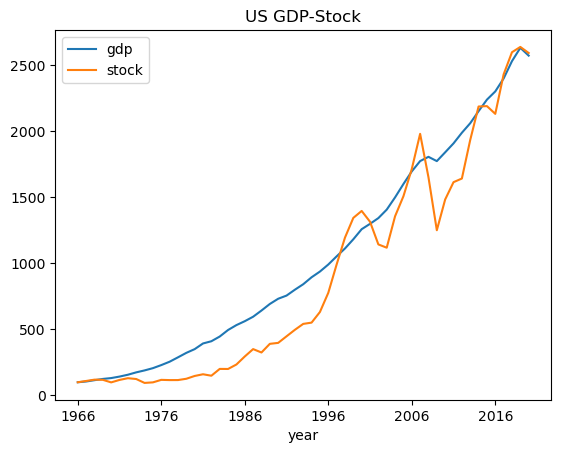

In [40]:
corr_data.plot(title='US GDP-Stock', xlabel='year')

In [41]:
corr_data.corr()

,gdp,stock
gdp,1.000000,0.981756
stock,0.981756,1.000000


# 한, 미 상관계수 비교
한 0.972, 미 0.981 로 비슷한 수준의 상관계수를 보여주었으며, 1~2개 국가와의 추가 비교를 진행 예정

# 중 상관 계수

## 중국 GDP

In [42]:
cn_gdp = gdp.loc[40][2:-1]
cn_gdp

1960       59716467625.314796
1961       50056868957.673203
1962       47209359005.605698
1963       50706799902.510399
1964       59708343488.504303
                ...          
2016    11233276536744.699219
2017    12310409370894.199219
2018    13894817549380.300781
2019         14279937467431.0
2020    14722730697890.099609
Name: 40, Length: 61, dtype: object

<Axes: title={'center': 'CN GDP'}>

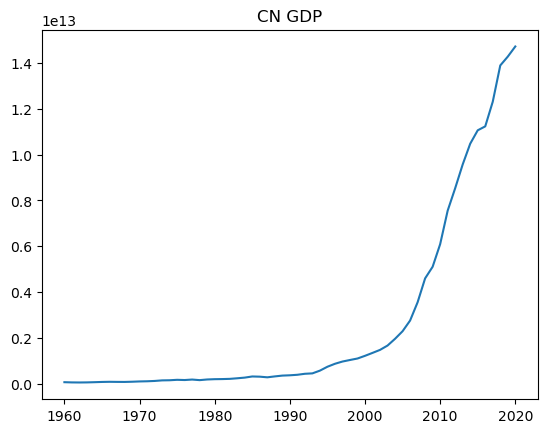

In [43]:
cn_gdp.plot(title='CN GDP')

## 중국 주가

In [44]:
cn_stock = stock[35388:41351]

In [45]:
cn_stock

,Index,Date,Open,High,Low,Close
35388,000001.SS,1997-07-02,1255.909058,1261.571045,1147.331055,1199.061035
35389,000001.SS,1997-07-03,1194.676025,1194.676025,1149.939941,1150.623047
35390,000001.SS,1997-07-04,1138.921021,1163.249023,1124.776001,1159.342041
35391,000001.SS,1997-07-07,1161.707031,1163.447021,1085.572021,1096.818970
35392,000001.SS,1997-07-08,1092.798950,1115.432983,1066.043945,1109.666016
...,...,...,...,...,...,...
41346,000001.SS,2021-05-25,3502.540039,3584.580078,3502.439941,3581.340088
41347,000001.SS,2021-05-26,3586.840088,3603.489990,3585.370117,3593.360107
41348,000001.SS,2021-05-27,3585.729980,3626.360107,3579.260010,3608.850098
41349,000001.SS,2021-05-28,3610.770020,3622.179932,3582.360107,3600.780029


### 주가 연평균

In [46]:
y = {}
for i in range(1997,2021):
    y[i] = []

In [47]:
for i in range(35388,41350):
    for j in y:
        if int(cn_stock.loc[i]['Date'][:4]) == j:
            y[j].append(float(cn_stock.loc[i]['Open']))
y[1997][:3]

[1255.909058, 1194.676025, 1138.921021]

In [48]:
cn_stock_year_avg={}

for i in y:
    cn_stock_year_avg[i] = sum(y[i])/len(y[i])/11.341

cn_stock_year_avg = list(cn_stock_year_avg.values())
cn_stock_year_avg[:3]

[100.00253477923444, 104.88640729749754, 110.86645337957658]

## 상관계수

In [49]:
corr_data = pd.DataFrame({'gdp':cn_gdp[37:]/9616000000,'stock':cn_stock_year_avg})
corr_data.head()

,gdp,stock
1997,100.000411,100.002535
1998,107.013633,104.886407
1999,113.768435,110.866453
2000,125.972012,151.776753
2001,139.28824,158.813437


<Axes: title={'center': 'CN GDP-Stock'}, xlabel='year'>

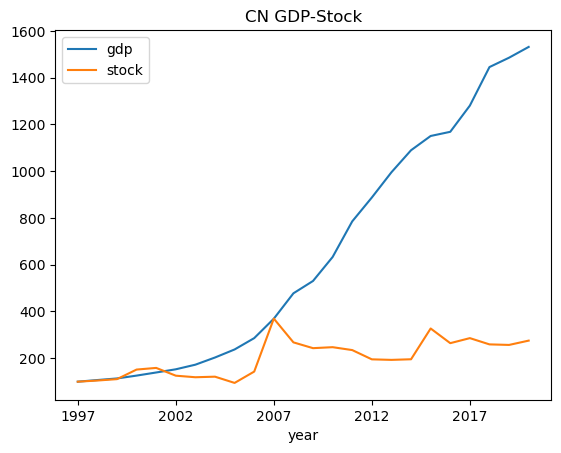

In [50]:
corr_data.plot(title='CN GDP-Stock', xlabel='year')

In [51]:
corr_data.corr()

,gdp,stock
gdp,1.000000,0.677422
stock,0.677422,1.000000


# 한국 기준금리 데이터 추가

In [52]:
kr_interest_rate = [4.75, 5.25, 4.0, 4.25, 3.75, 3.25, 3.75, 4.5, 5.0, 3.0, 2.0, 2.5, 3.25, 2.75, 2.5, 2.0, 1.5, 1.25, 1.5, 1.75, 1.25, 0.5]

In [53]:
kr_corr_data = kr_corr_data.drop(['1997','1998'])

kr_corr_data['interest_rate']=kr_interest_rate

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

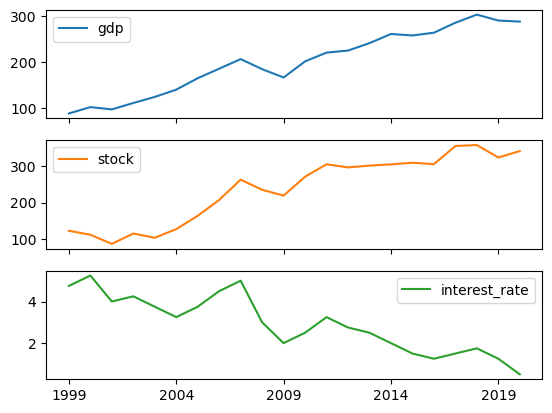

In [54]:
kr_corr_data.plot(subplots=True)

In [55]:
kr_corr_data.corr()

,gdp,stock,interest_rate
gdp,1.000000,0.969011,-0.817578
stock,0.969011,1.000000,-0.767394
interest_rate,-0.817578,-0.767394,1.000000


<Axes: >

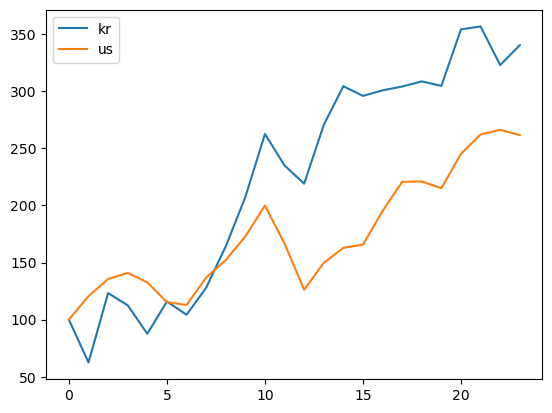

In [56]:
pd.DataFrame({'kr':kr_stock_year_avg,'us': [i*100/us_stock_year_avg[-len(kr_stock_year_avg):][0] for i in us_stock_year_avg[-len(kr_stock_year_avg):]]}).plot()